In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
px.scatter(df,x='Age',y='EstimatedSalary',color='Purchased',symbol='Purchased')

<AxesSubplot:>

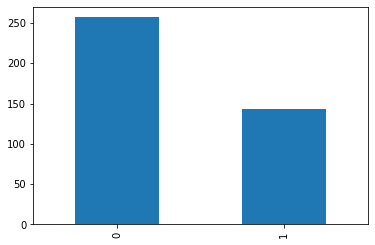

In [4]:
df.Purchased.value_counts().plot(kind='bar')

In [5]:
X = df[['Age','EstimatedSalary']]
y = df['Purchased']
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
xtrain, xtest, ytrain, ytest = train_test_split(scaledX,y,test_size=.2,)
xtrain.shape,xtest.shape

((320, 2), (80, 2))

In [6]:
m = LogisticRegression()
m.fit(xtrain, ytrain)

LogisticRegression()

In [7]:
m.score(xtest,ytest) # you should not see the score like this, we use other stuff

0.8125

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [9]:
ypred = m.predict(xtest)

In [10]:
import seaborn as sns

In [11]:
cm = confusion_matrix(ytest, ypred)
print(cm)

[[48  4]
 [11 17]]


In [12]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        52
           1       0.81      0.61      0.69        28

    accuracy                           0.81        80
   macro avg       0.81      0.77      0.78        80
weighted avg       0.81      0.81      0.81        80



### prediction